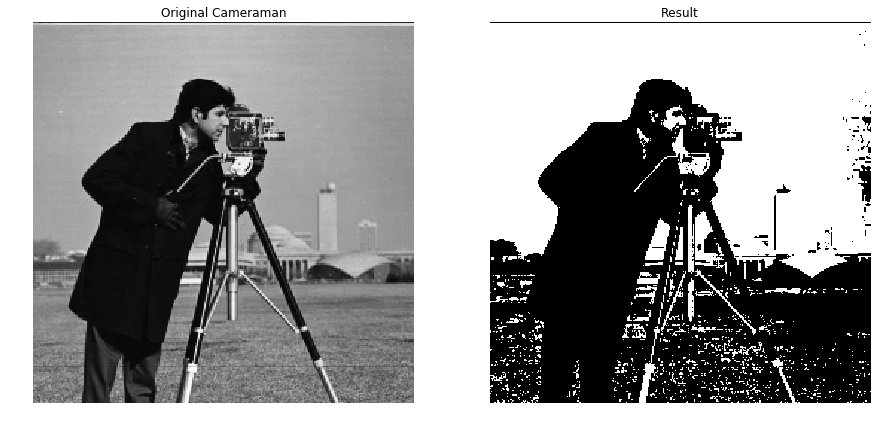

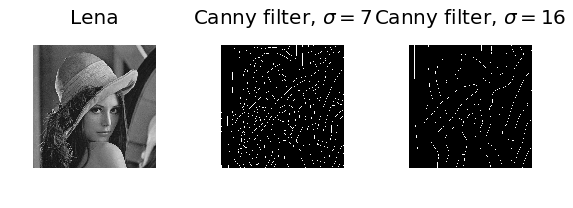

In [53]:
# Task: apply canny filter for Lena
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

import os
from scipy import ndimage as ndi
from skimage import io
from skimage import feature
from skimage.data import data_dir
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.morphology import erosion, skeletonize, dilation, opening, closing

# Compute the Canny filter for two values of sigma
im = img.imread('lena_cover.jpg')
# im = im.squeeze()
lenaImage = np.mean(im, -1)

edges1 = feature.canny(lenaImage, sigma = 7)
edges2 = feature.canny(lenaImage, sigma = 16)

# display results for Lena image
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(lenaImage, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Lena', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=7$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=16$', fontsize=20)

fig.tight_layout()

plt.show()

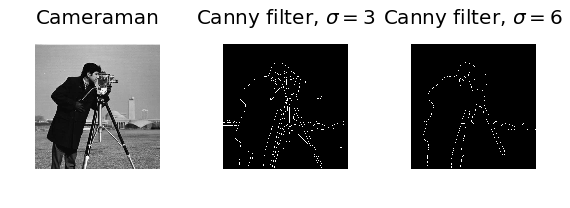

In [52]:
# Task: apply canny filter for Cameraman

# Compute the Canny filter for two values of sigma
cameraImage = img.imread('cameraman.jpg')

edges3 = feature.canny(cameraImage, sigma = 3)
edges4 = feature.canny(cameraImage, sigma = 6)

# display results for Lena image
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(cameraImage, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Cameraman', fontsize=20)

ax2.imshow(edges3, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=3$', fontsize=20)

ax3.imshow(edges4, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=6$', fontsize=20)

fig.tight_layout()

plt.show()

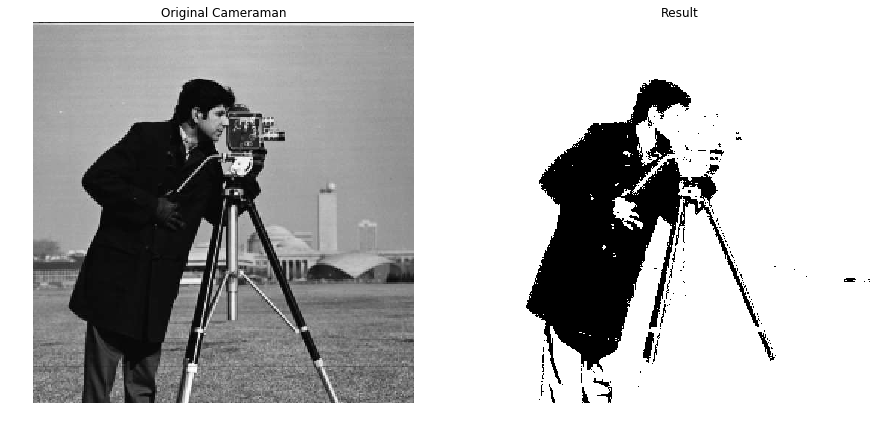

In [49]:
# Task: Cameraman binarization

cameraImage = img.imread('cameraman.jpg')
# image = img.imread('lena_cover.jpg')
# image = data.camera()
cameraTh = np.median(cameraImage)
cameraBinary = cameraImage > (cameraTh-125)

fig, axes = plt.subplots(ncols = 2, figsize = (15, 10))
ax = axes.ravel()

ax[0].imshow(cameraImage, cmap = plt.cm.gray)
ax[0].set_title('Original Cameraman')

ax[1].imshow(cameraBinary, cmap = plt.cm.gray)
ax[1].set_title('Result')

for a in ax:
    a.axis('off')

plt.show()

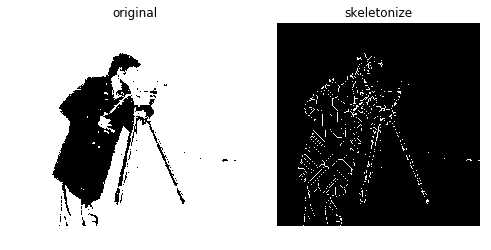

In [50]:
# Task: Skeletonize the Cameraman

def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')
    plt.show()

# cameraman = io.imread(os.path.join(data_dir, "cameraman.jpg"), as_grey=True)
cameraSkeleton = skeletonize(cameraBinary == 0)
plot_comparison(cameraBinary, cameraSkeleton, 'skeletonize')

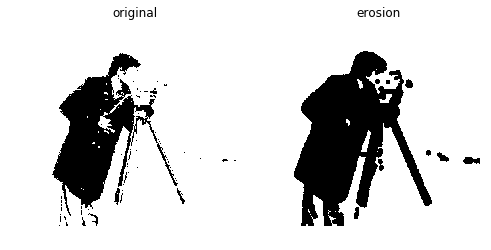

In [51]:
# Task: Erode the Cameraman

selem = disk(6)
cameraEroded = erosion(cameraBinary, selem)
plot_comparison(cameraBinary, cameraEroded, 'erosion')

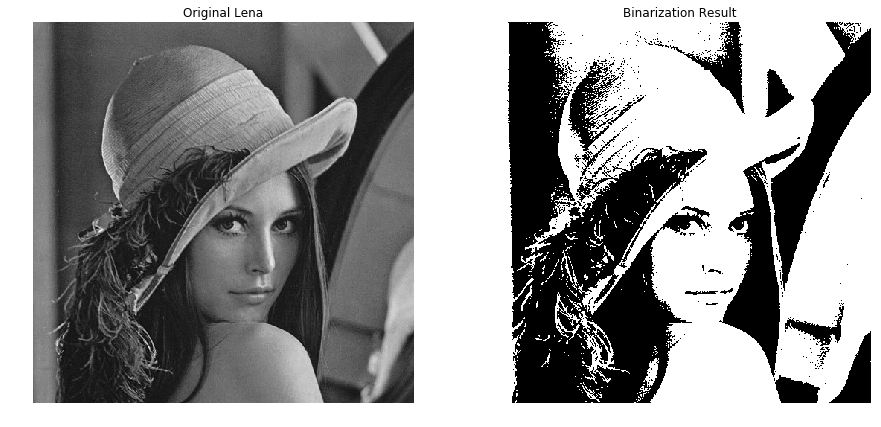

In [65]:
# Task: Lena binarization

# lenaImage = img.imread('lena_cover.jpg')
im = img.imread('lena_cover.jpg')
# im = im.squeeze()
lenaImage = np.mean(im, -1)

lenaTh = np.median(lenaImage)
lenaBinary = lenaImage > (lenaTh-10)

fig, axes = plt.subplots(ncols = 2, figsize = (15, 10))
ax = axes.ravel()

ax[0].imshow(lenaImage, cmap = plt.cm.gray)
ax[0].set_title('Original Lena')

ax[1].imshow(lenaBinary, cmap = plt.cm.gray)
ax[1].set_title('Binarization Result')

for a in ax:
    a.axis('off')

plt.show()

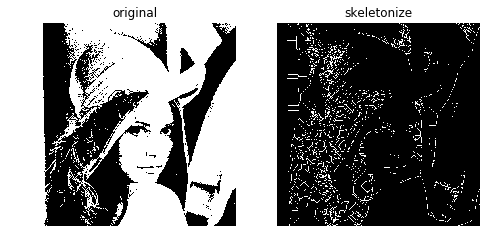

In [66]:
# Task: Skeletonize Lena

# cameraman = io.imread(os.path.join(data_dir, "cameraman.jpg"), as_grey=True)
lenaSkeleton = skeletonize(lenaBinary == 0)
plot_comparison(lenaBinary, lenaSkeleton, 'skeletonize')

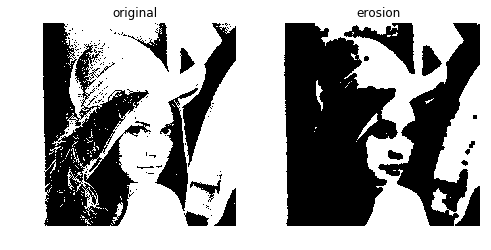

In [67]:
# Task: Erode Lena

selem_Lena = disk(6)
lenaEroded = erosion(lenaBinary, selem_Lena)
plot_comparison(lenaBinary, lenaEroded, 'erosion')